<a href="https://colab.research.google.com/github/javmohir/Regression/blob/main/chiziqli_regressiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


 Machine Learning.
Linear Regression

Ustunlar ta'rifi
location - sotilayotgan uy manzili
district - uy joylashgan tuman
rooms - xonalar soni
size - uy maydoni (kv.m)
level - uy


In [48]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz

In [49]:
housing = df[df.district=='Чиланзарский']
housing.head()


,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [50]:
X = housing['size'].to_numpy()
X

array([42., 65., 70., ..., 32., 70., 30.])

In [51]:
y = housing['price'].to_numpy()
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


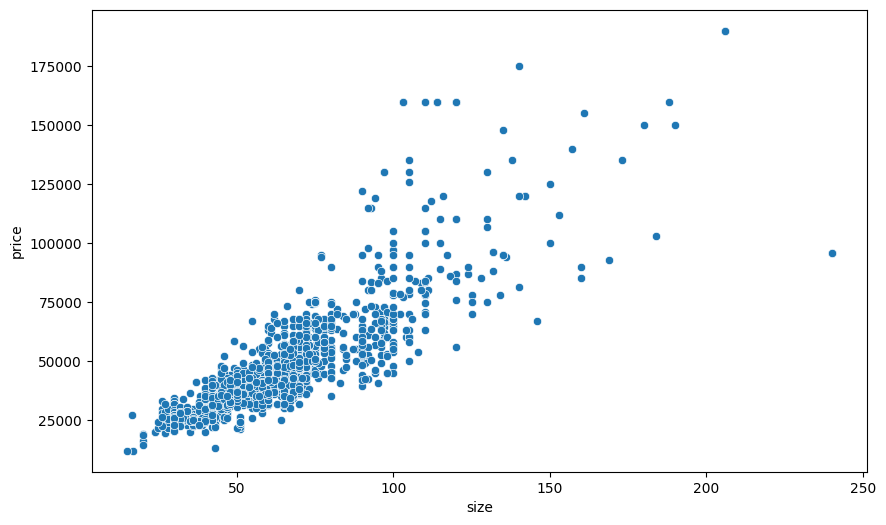

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

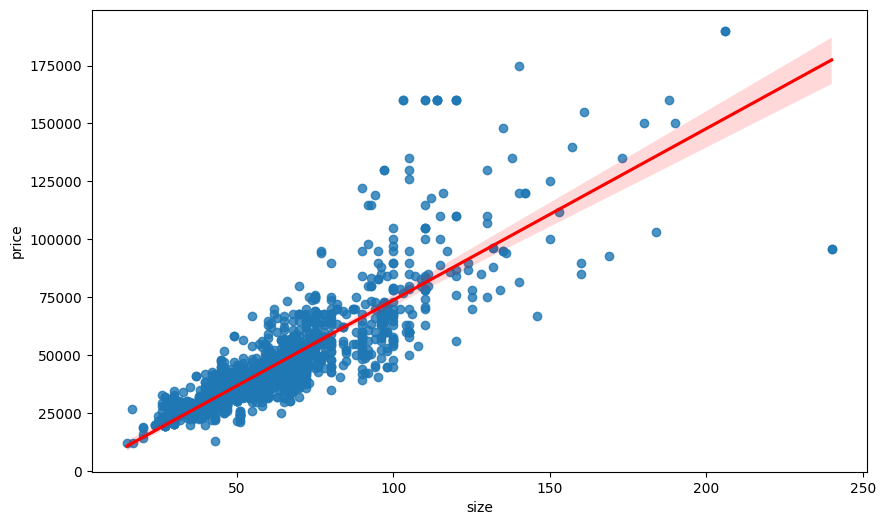

In [54]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

1-Vazifa
Sizning vazifangiz yuqoridagi X va y o'zgaruvchilardan quyidagi formuladan foydalangan xolda
�
0
θ
0
​
  va
�
1
θ
1
​
  koeffisientlarni hisoblash.

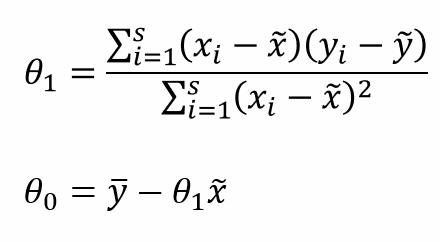

Bu yerda
�
~
x
~
  - X ustun uchun o'rtracha qiymat,
�
~
y
~
​
  - y ustun uchun o'rtracha qiymat



In [55]:
import numpy as np

Xmean = np.mean(X)
ymean = np.mean(y)

In [56]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(f"{theta1=}")

theta1=740.0264822713287


2-Vazifa
X dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi y ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

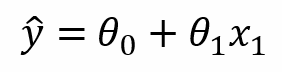

In [57]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")


x_test=array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])
y_test=array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])


In [58]:
y_predict = theta0 + theta1*x_test
print(f"{y_predict=}")

y_predict=array([40067.74847435, 31187.4306871 , 26747.27179347, 44507.90736798,
       35627.58958072, 50428.11922615, 28227.32475801, 48208.03977934,
       38587.69550981, 32667.48365164])


3-Vazifa
Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

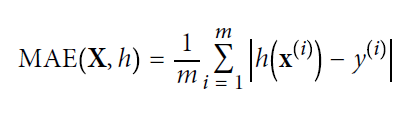

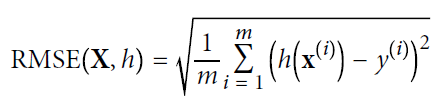

In [59]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")

MAE=4382.164352529557


In [60]:
# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=6062.459379312713
